In [1]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel
import pandas as pd
import numpy as np

In [2]:
Iris= pd.read_csv('Iris.csv',names=['Id','Sepal-length (cm)','Sepal-width (cm)','Petal-length (cm)','Petal-width (cm)'])

In [3]:
Iris

Id  Sepal-length (cm)  Sepal-width (cm)  Petal-length (cm)  \
0      1                5.1               3.5                1.4   
1      2                4.9               3.0                1.4   
2      3                4.7               3.2                1.3   
3      4                4.6               3.1                1.5   
4      5                5.0               3.6                1.4   
5      6                5.4               3.9                1.7   
6      7                4.6               3.4                1.4   
7      8                5.0               3.4                1.5   
8      9                4.4               2.9                1.4   
9     10                4.9               3.1                1.5   
10    11                5.4               3.7                1.5   
11    12                4.8               3.4                1.6   
12    13                4.8               3.0                1.4   
13    14                4.3               3.0                1.1   
14    15                5.8               4.0                1.2   
15    16                5.7               4.4                1.5   
16    17                5.4               3.9                1.3   
17    18                5.1               3.5                1.4   
18    19                5.7               3.8                1.7   
19    20                5.1               3.8                1.5   
20    21                5.4               3.4                1.7   
21    22                5.1               3.7                1.5   
22    23                4.6               3.6                1.0   
23    24                5.1               3.3                1.7   
24    25                4.8               3.4                1.9   
25    26                5.0               3.0                1.6   
26    27                5.0               3.4                1.6   
27    28                5.2               3.5                1.5   
28    29                5.2               3.4                1.4   
29    30                4.7               3.2                1.6   
..   ...                ...               ...                ...   
120  121                6.9               3.2                5.7   
121  122                5.6               2.8                4.9   
122  123                7.7               2.8                6.7   
123  124                6.3               2.7                4.9   
124  125                6.7               3.3                5.7   
125  126                7.2               3.2                6.0   
126  127                6.2               2.8                4.8   
127  128                6.1               3.0                4.9   
128  129                6.4               2.8                5.6   
129  130                7.2               3.0                5.8   
130  131                7.4               2.8                6.1   
131  132                7.9               3.8                6.4   
132  133                6.4               2.8                5.6   
133  134                6.3               2.8                5.1   
134  135                6.1               2.6                5.6   
135  136                7.7               3.0                6.1   
136  137                6.3               3.4                5.6   
137  138                6.4               3.1                5.5   
138  139                6.0               3.0                4.8   
139  140                6.9               3.1                5.4   
140  141                6.7               3.1                5.6   
141  142                6.9               3.1                5.1   
142  143                5.8               2.7                5.1   
143  144                6.8               3.2                5.9   
144  145                6.7               3.3                5.7   
145  146                6.7               3.0                5.2   
146  147                6.3               2.5                5

In [4]:
#Loading the dataset
data = loadtxt('Iris.txt', delimiter=',')

In [5]:
#Evaluate the linear regression

def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1, good for working with learning algorithms.
    '''
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = mean(X[:, i])
        s = std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r


def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)

        theta_size = theta.size

        for it in range(theta_size):

            temp = X[:, it]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp

            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

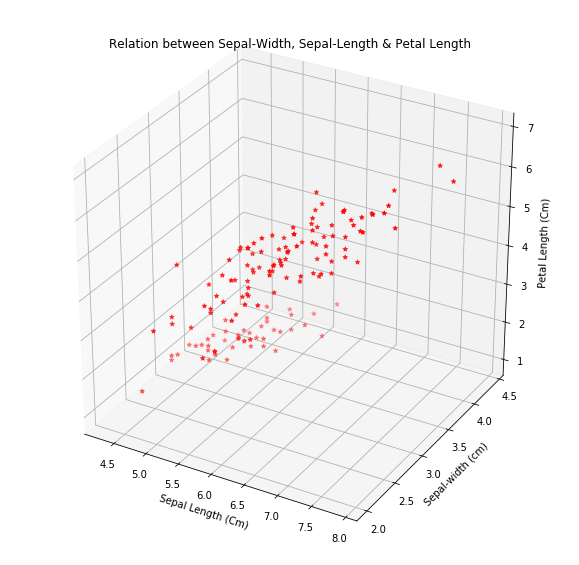

In [6]:
#Plot the data

fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', '*', -50, -25)]:
    xs = data[:, 1]
    ys = data[:, 2]
    zs = data[:, 3]
    ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('Sepal Length (Cm)')
ax.set_ylabel('Sepal-width (cm)')
ax.set_zlabel('Petal Length (Cm)')
plt.title('Relation between Sepal-Width, Sepal-Length & Petal Length')
plt.show()

[[ 3.05386204]
 [-0.27081023]
 [ 0.14315617]] [[ 4.74747933]
 [ 4.73814404]
 [ 4.72882744]
 ..., 
 [ 0.07272709]
 [ 0.07272707]
 [ 0.07272704]]


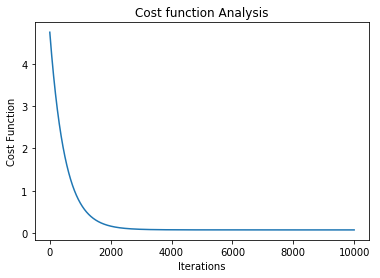

In [15]:
X = data[:, :2]
y = data[:, 2]

#number of training samples
m = y.size

y.shape = (m, 1)

#Scale features and set them to zero mean
x, mean_r, std_r = feature_normalize(X)

#Add a column of ones to X (interception data)
it = ones(shape=(m, 3))
it[:, 1:3] = x

#Some gradient descent settings
#iterations = 100
#alpha = 0.01

iterations = 10000
alpha = 0.001

#Init Theta and Run Gradient Descent
theta = zeros(shape=(3, 1))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)
print (theta, J_history)
plot(arange(iterations), J_history)
plt.title('Cost function Analysis')
xlabel('Iterations')
ylabel('Cost Function')
show()

In [17]:
#Prediction of sepal length = 7 cm.
SepalLength = array([1.0,((7 - mean_r[0]) / std_r[0]),((7 - mean_r[1]) / std_r[1])]).dot(theta)
print ('Prediction of sepal length that is 7 cm: %f' % (SepalLength))

Prediction of sepal length that is 7 cm: 2.160284
